# Imports

In [69]:
import plotnine as gg
gg.theme_set(gg.theme_bw)
import numpy as np
import os
import pandas as pd

from Functions import get_info_from_fullID

# Directories

In [70]:
base_dir = 'C:/Users/maria/MEGAsync/SLCN'
param_dir = os.path.join(base_dir, 'PShumanData/fitting/mice/')
plot_save_dir = os.path.join(base_dir, 'models/plots/')

# Plot model fits

In [71]:
model_fits = pd.read_csv(os.path.join(param_dir, 'plots', 'modelwise_LLS.csv'))
model_fits = model_fits.sort_values(by=['WAIC']).reset_index(drop=True)
model_fits

,model_name,slope_variable,n_subj,WAIC,NLL,AIC
0,Bbspr,age_z,440,197248.390625,96864.195312,197248.390625
1,RLabcpnxd,age_z,440,199314.156250,96577.078125,199314.156250
2,RLabnp2d,age_z,440,199711.000000,97215.500000,199711.000000
3,Bbpr,age_z,440,201298.031250,99329.015625,201298.031250
4,RLabcpnd,age_z,440,204218.984375,99469.492188,204218.984375
5,RLabcpd,age_z,440,204478.062500,100039.031250,204478.062500
6,RLabcd,age_z,440,210260.765625,103370.382812,210260.765625
7,Bbp,age_z,440,212944.000000,105592.000000,212944.000000
8,RLabd,age_z,440,220771.937500,109065.968750,220771.937500
9,RLab,age_z,440,224235.609375,111237.804688,224235.609375


In [72]:
# winning_model_name = model_fits[model_fits.WAIC == np.min(model_fits.WAIC)].model_name.values[0]
winning_model_names = ['Bbspr', 'RLabcpnxd']

C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 5 x 4 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN\models/plots/WAICs.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


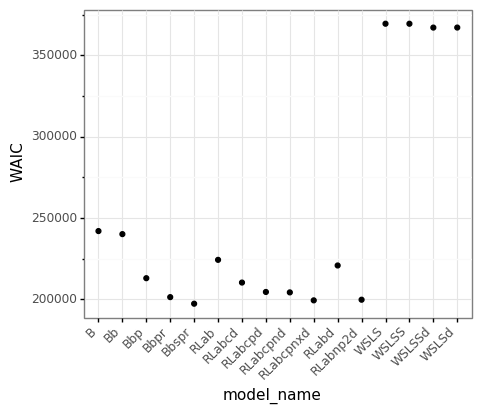

In [73]:
g = (gg.ggplot(model_fits, gg.aes('model_name', 'WAIC'))
 + gg.geom_point()
 + gg.theme_bw()
 + gg.theme(axis_text_x=gg.element_text(rotation=45, hjust=1))
)
g.draw()
g.save(os.path.join(plot_save_dir, 'WAICs.png'))

In [74]:
fits = pd.read_csv(os.path.join(param_dir, 'plots', 'subjwise_LLs.csv'))
fits = fits.drop(columns=['slope_variable', 'n_subj'])
fits

,model_name,n_params,1404012,1404112,1404212,1404312,1404412,1404512,1404612,1404712,...,1307921,1308021,1308121,1308221,1308321,1308521,1308621,1308821,1308921,1309021
0,Bbpr,3,-179.046280,-248.755554,-278.405426,-168.795166,-204.104340,-222.730652,-218.878693,-180.499008,...,-160.981201,-248.317505,-192.488037,-199.843521,-249.001068,-205.609344,-202.347961,-196.608765,-186.844833,-182.177032
1,Bbp,2,-186.931534,-255.898743,-308.405914,-209.410095,-219.217590,-245.978561,-245.861603,-200.148468,...,-172.985916,-272.347321,-208.253967,-223.410660,-257.394684,-233.402557,-218.973465,-216.939423,-207.352051,-201.487915
2,Bbspr,4,-177.459900,-246.617767,-276.449310,-175.104767,-197.874847,-214.055923,-212.107193,-178.711304,...,-158.803848,-247.062820,-188.766739,-194.479401,-241.374435,-201.661652,-201.484528,-195.527283,-176.549667,-171.459717
3,Bb,1,-270.397247,-339.216888,-341.097137,-251.461670,-244.267914,-256.332428,-267.607910,-237.350525,...,-239.102753,-294.276245,-237.313858,-242.320129,-260.615936,-251.828369,-245.618088,-242.687256,-220.056610,-197.159775
4,B,0,-263.531647,-356.232697,-353.032593,-236.771194,-234.533081,-248.492554,-239.934586,-223.431046,...,-229.291473,-294.275848,-226.521332,-229.715851,-269.270050,-238.873337,-233.356308,-229.804382,-201.228287,-190.903793
5,RLabcd,4,-219.873062,-278.411774,-303.284454,-186.661194,-204.739609,-240.162506,-231.623749,-198.956100,...,-173.239777,-271.562225,-195.572723,-197.251663,-250.871735,-213.684998,-204.915466,-202.915237,-172.437241,-180.340668
6,RLabcpd,5,-194.452774,-250.626816,-284.715973,-173.116028,-199.339294,-236.408798,-226.111191,-202.040100,...,-166.335632,-265.743103,-193.591812,-197.121353,-252.127945,-213.155624,-203.170914,-204.647003,-180.603378,-171.993393
7,RLabcpnd,6,-191.895905,-249.983124,-287.604126,-181.173172,-202.667419,-238.214615,-224.915649,-201.716858,...,-165.992157,-262.031464,-193.511307,-197.395615,-250.332932,-212.303268,-203.136215,-196.584778,-164.099380,-173.223557
8,RLabcpnxd,7,-178.495377,-247.538116,-256.834473,-170.582245,-185.295151,-220.779343,-207.259506,-180.323334,...,-157.393341,-250.797241,-188.710754,-193.034714,-239.808487,-207.372177,-201.148804,-193.622818,-166.891815,-158.013535
9,RLabd,3,-231.364120,-314.978302,-329.517609,-183.613785,-209.781021,-252.852997,-244.731644,-207.107071,...,-192.604965,-276.437286,-221.775421,-230.292694,-266.506989,-226.055908,-210.127213,-243.406967,-188.445618,-191.387573


In [76]:
# Melt
fits_ = pd.melt(fits, id_vars=['model_name', 'n_params'], var_name='fullID', value_name='LL')

# Add BIC and AIC
n_trials = 725
for row in range(len(fits_)):
    fits_.loc[row, 'AIC'] = 2 * fits_.loc[row, 'n_params'] - 2 * fits_.loc[row, 'LL']
    fits_.loc[row, 'BIC'] = np.log(n_trials) * fits_.loc[row, 'n_params'] - 2 * fits_.loc[row, 'LL']

# Add animal id, age, gender
keys = get_info_from_fullID(fits_.fullID[0]).keys()
for row in range(len(fits_)):
    for key in keys:
        fits_.loc[row, key] = get_info_from_fullID(fits_.fullID[row])[key]
fits_

,model_name,n_params,fullID,LL,AIC,BIC,animal,age,gender,agegroup
0,Bbpr,3,1404012,-179.046280,364.092560,377.851075,14.0,40.0,Male,Juvenile
1,Bbp,2,1404012,-186.931534,377.863068,387.035411,14.0,40.0,Male,Juvenile
2,Bbspr,4,1404012,-177.459900,362.919800,381.264486,14.0,40.0,Male,Juvenile
3,Bb,1,1404012,-270.397247,542.794495,547.380666,14.0,40.0,Male,Juvenile
4,B,0,1404012,-263.531647,527.063293,527.063293,14.0,40.0,Male,Juvenile
...,...,...,...,...,...,...,...,...,...,...
7035,RLab,2,1309021,-206.077911,416.155823,425.328166,13.0,90.0,Female,Adult
7036,WSLSd,1,1309021,-399.136200,800.272400,804.858572,13.0,90.0,Female,Adult
7037,WSLSSd,1,1309021,-399.959808,801.919617,806.505788,13.0,90.0,Female,Adult
7038,WSLSS,0,1309021,-404.351166,808.702332,808.702332,13.0,90.0,Female,Adult


C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 5 x 4 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN\models/plots/LLs.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 5 x 4 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN\models/plots/BICs.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 5 x 4 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\pl

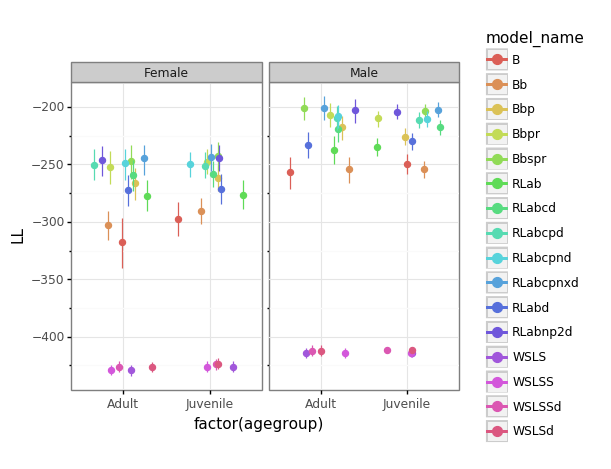

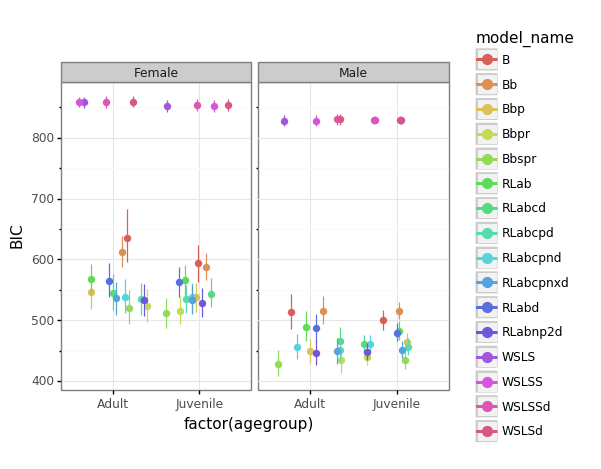

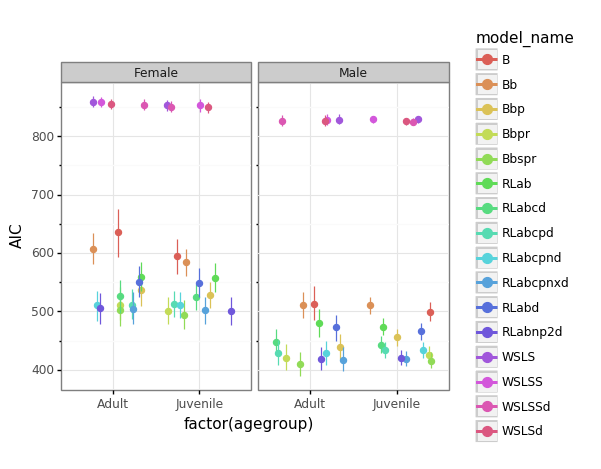

In [77]:
for yax in ['LL', 'BIC', 'AIC']:
    g = (gg.ggplot(fits_, gg.aes('factor(agegroup)', yax, color='model_name'))
     + gg.stat_summary(position='jitter')
     + gg.facet_wrap('~ gender')
    )
    g.draw()
    g.save(os.path.join(plot_save_dir, '{}s.png'.format(yax)))

In [78]:
# Get AICs
AICs = fits_.pivot_table(columns='model_name', index=['fullID', 'gender', 'agegroup'], values='AIC')

for col in AICs.columns:
    if 'RL' in col:
        ref_col = 'RLabcpnxd'
    elif ('B' in col) or ('WSLS' in col):
        ref_col = 'Bbspr'
    AICs['{}_minus_{}'.format(col, ref_col)] = AICs[col] - AICs[ref_col]
ref_col, col = winning_model_names
AICs['{}_minus_{}'.format(col, ref_col)] = AICs[col] - AICs[ref_col]

# AIC differences
AICs_rel = AICs.drop(columns=[col for col in AICs.columns if
                              (not 'minus' in col) and (not col=='gender') and (not col=='agegroup')])
AICs_rel = AICs_rel.reset_index()
AICs_rel = AICs_rel.melt(id_vars=['fullID', 'gender', 'agegroup'], value_name='AIC')
AICs_rel

,fullID,gender,agegroup,model_name,AIC
0,1007421,Female,Adult,B_minus_Bbspr,552.571106
1,1007521,Female,Adult,B_minus_Bbspr,300.447449
2,1007621,Female,Adult,B_minus_Bbspr,343.285339
3,1007721,Female,Adult,B_minus_Bbspr,144.600037
4,1007821,Female,Adult,B_minus_Bbspr,173.280701
...,...,...,...,...,...
7475,908421,Female,Adult,RLabcpnxd_minus_Bbspr,17.489990
7476,908521,Female,Adult,RLabcpnxd_minus_Bbspr,9.576416
7477,908621,Female,Adult,RLabcpnxd_minus_Bbspr,28.352905
7478,908721,Female,Adult,RLabcpnxd_minus_Bbspr,29.223389


C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 10 x 5 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN\models/plots/RelativeAICs2.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


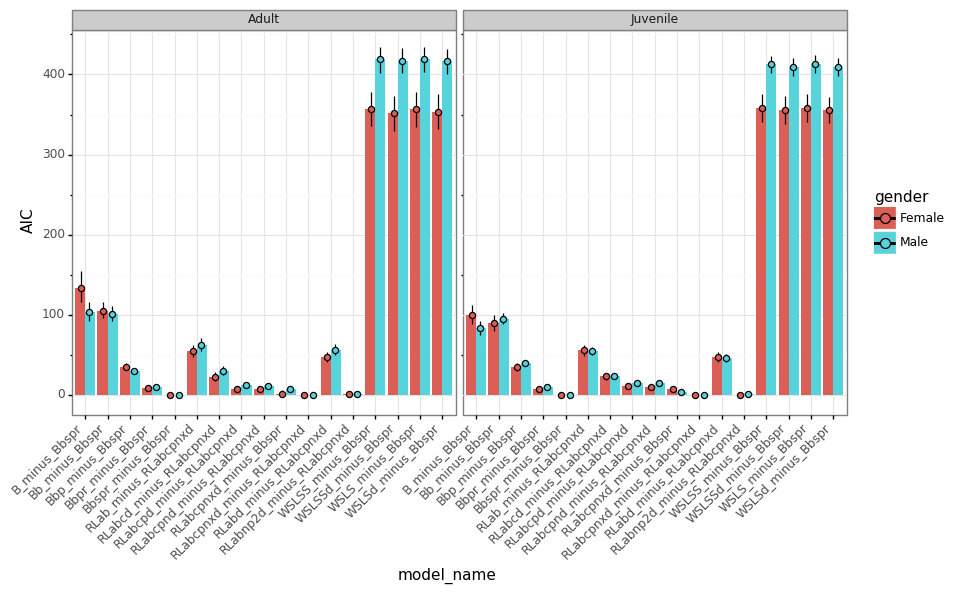

In [79]:
# Plot AIC differences
gg.options.figure_size = (10, 5)
g = (gg.ggplot(AICs_rel, gg.aes('model_name', 'AIC', fill='gender'))
 + gg.stat_summary(geom='bar', position=gg.position_dodge)
 + gg.stat_summary(position=gg.position_dodge(width=0.75))
#  + gg.geom_point()
 + gg.theme(axis_text_x=gg.element_text(rotation=45, hjust=1))
 + gg.facet_grid('~ agegroup')
)
g.draw()
g.save(os.path.join(plot_save_dir, 'RelativeAICs2.png'))

# Load fitted parameters

In [18]:
all_params = pd.DataFrame()
for file in os.listdir(param_dir):
    if ('csv' in file) and ('nll' not in file):
        new_params = pd.read_csv(os.path.join(param_dir, file))
        all_params = all_params.append(new_params)
all_params.beta /= 15
all_params['age_group'] = ['adult' if treatment == 1 else 'juvenile' for treatment in all_params.treatment]
all_params

,Gender,PDS,PreciseYrs,T1,age_z,alpha,animal,beta,bias,calpha,...,nalpha,p_noisy,p_reward,p_switch,persev,sID,session,slope_variable,treatment,age_group
0,Male,0,40,0,-1.052255,NaN,14,0.146587,NaN,NaN,...,NaN,0.00001,0.948604,0.050816,0.511863,1404012,0,age_z,2,juvenile
1,Male,0,41,0,-0.997610,NaN,14,0.112091,NaN,NaN,...,NaN,0.00001,0.965751,0.050816,0.530221,1404112,1,age_z,2,juvenile
2,Male,0,42,0,-0.942965,NaN,14,0.108359,NaN,NaN,...,NaN,0.00001,0.983376,0.050816,0.472071,1404212,2,age_z,2,juvenile
3,Male,0,43,0,-0.888320,NaN,14,0.473015,NaN,NaN,...,NaN,0.00001,0.993359,0.050816,0.436275,1404312,3,age_z,2,juvenile
4,Male,0,44,0,-0.833675,NaN,14,0.171381,NaN,NaN,...,NaN,0.00001,0.963808,0.050816,0.360621,1404412,4,age_z,2,juvenile
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,Female,0,85,0,1.406765,0.816118,13,0.282965,0.0,0.0,...,0.816118,NaN,NaN,NaN,0.000000,1308521,11,age_z,1,adult
436,Female,0,86,0,1.461410,0.757376,13,0.333722,0.0,0.0,...,0.757376,NaN,NaN,NaN,0.000000,1308621,12,age_z,1,adult
437,Female,0,88,0,1.570700,0.654044,13,0.238064,0.0,0.0,...,0.654044,NaN,NaN,NaN,0.000000,1308821,13,age_z,1,adult
438,Female,0,89,0,1.625345,0.794029,13,0.340368,0.0,0.0,...,0.794029,NaN,NaN,NaN,0.000000,1308921,14,age_z,1,adult


In [19]:
parameter_colnames = ['alpha', 'beta', 'calpha', 'cnalpha', 'm', 'nalpha', 'persev']
animal_colnames = ['Gender', 'PDS', 'PreciseYrs', 'T1', 'age_z', 'animal', 'fullID', 'sID', 'session', 'treatment', 'age_group']
all_params_long = pd.melt(all_params, id_vars=animal_colnames + ['model', 'slope_variable'],
                          var_name='param_name', value_name='param_value')
all_params_long = all_params_long[all_params_long.param_value != 0]
all_params_long

,Gender,PDS,PreciseYrs,T1,age_z,animal,fullID,sID,session,treatment,age_group,model,slope_variable,param_name,param_value
0,Male,0,40,0,-1.052255,14,1404012,1404012,0,2,juvenile,Bbpr,age_z,alpha,NaN
1,Male,0,41,0,-0.997610,14,1404112,1404112,1,2,juvenile,Bbpr,age_z,alpha,NaN
2,Male,0,42,0,-0.942965,14,1404212,1404212,2,2,juvenile,Bbpr,age_z,alpha,NaN
3,Male,0,43,0,-0.888320,14,1404312,1404312,3,2,juvenile,Bbpr,age_z,alpha,NaN
4,Male,0,44,0,-0.833675,14,1404412,1404412,4,2,juvenile,Bbpr,age_z,alpha,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52355,Female,0,85,0,1.406765,13,1308521,1308521,11,1,adult,RLabnp2d,age_z,persev,0.511338
52356,Female,0,86,0,1.461410,13,1308621,1308621,12,1,adult,RLabnp2d,age_z,persev,0.464149
52357,Female,0,88,0,1.570700,13,1308821,1308821,13,1,adult,RLabnp2d,age_z,persev,0.382536
52358,Female,0,89,0,1.625345,13,1308921,1308921,14,1,adult,RLabnp2d,age_z,persev,0.262305


# Plotting functions

In [57]:
def plot_session_params(data, winning_model_name):

    g = (gg.ggplot(data, gg.aes('session', 'param_value', color='age_group'))
     + gg.geom_point(alpha=0.5)
     + gg.theme_bw()
     + gg.geom_smooth()
     + gg.coord_cartesian(xlim=(0, 12))
     + gg.facet_grid('model~param_name')
    )
    g.draw()
    g.save(os.path.join(plot_save_dir, 'ParamsSession_{}.png'.format(winning_model_name)))

In [59]:
def plot_agegroup_params(data, winning_model_name):

    g = (gg.ggplot(data,
               gg.aes('age_group', 'param_value', fill='Gender'))
     + gg.stat_summary(geom='bar', position=gg.position_dodge)
     + gg.stat_summary(geom='pointrange', position=gg.position_dodge(width=0.75))
     + gg.theme_bw()
     + gg.facet_grid('model~param_name')
    )
    g.draw()
    g.save(os.path.join(plot_save_dir, 'ParamsAgegroup_{}.png'.format(winning_model_name)))

In [67]:
def plot_age_params(data, winning_model_name, file_name_sub=''):

    g = (gg.ggplot(data, gg.aes('PreciseYrs', 'param_value', color='Gender'))
     + gg.geom_point()
     + gg.theme_bw()
     + gg.geom_smooth()
     + gg.facet_grid('model~param_name')
     + gg.labs(x='Age')
    )
    g.draw()
    g.save(os.path.join(plot_save_dir, 'ParamsAge_{}{}.png'.format(winning_model_name, file_name_sub)))

# Plot winning models

C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\stats\smoothers.py:168: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  "for lowess smoothings.", PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 5 x 4 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN\models/plots/ParamsAge_Bbsprsession0.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\stats\smoothers.py:168: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  "for lowess smoothings.", PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\stats\smoothers.py:168: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoo

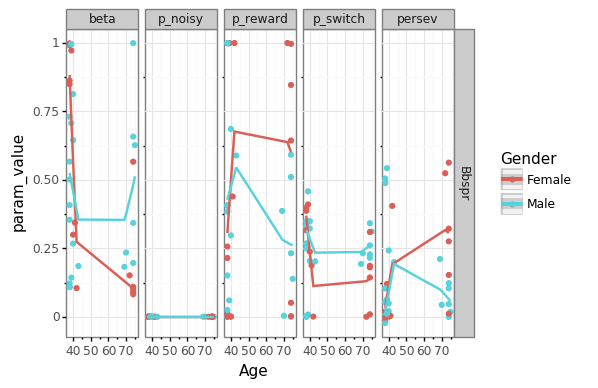

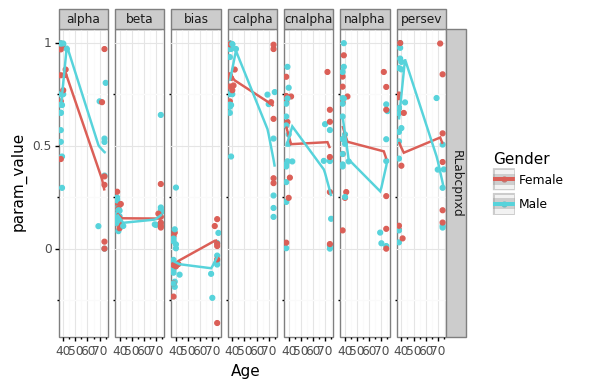

In [68]:
for winning_model_name in winning_model_names:

    # Subset model data
    win_mod_sub = all_params_long.model == winning_model_name
    not_nan_sub = np.invert(np.isnan(all_params_long.loc[win_mod_sub, 'param_value']))
    sub_dat = all_params_long[np.logical_and(win_mod_sub, not_nan_sub)]
    
    # Plot
    gg.options.figure_size = (5, 4)
    plot_session_params(sub_dat, winning_model_name)
    plot_agegroup_params(sub_dat, winning_model_name)
    plot_age_params(sub_dat, winning_model_name)
    plot_age_params(sub_dat[sub_dat.session == 0], winning_model_name, 'session0')

# Plot all models

In [ ]:
g = (gg.ggplot(all_params_long, gg.aes('PreciseYrs', 'param_value', color='Gender'))
 + gg.geom_point()
 + gg.theme_bw()
 + gg.geom_smooth()
 + gg.facet_grid('model~param_name')
 + gg.labs(x='Age')
)
g.draw()
g.save(os.path.join(plot_save_dir, 'allModelsParamsAge.png'))

In [ ]:
g = (gg.ggplot(all_params_long, gg.aes('session', 'param_value', color='age_group'))
 + gg.geom_point()
 + gg.theme_bw()
 + gg.geom_smooth()
 + gg.coord_cartesian(xlim=(0, 12))
 + gg.facet_grid('model~param_name')
)
g.draw()
g.save(os.path.join(plot_save_dir, 'allModelsParamsSession.png'))

In [ ]:
g = (gg.ggplot(all_params_long,
           gg.aes('age_group', 'param_value', fill='Gender'))
 + gg.stat_summary(geom='bar', position=gg.position_dodge)
 + gg.stat_summary(geom='pointrange', position=gg.position_dodge(width=0.75))
 + gg.theme_bw()
 + gg.facet_grid('model~param_name')
)
g.draw()
g.save(os.path.join(plot_save_dir, 'allModelsParamsAgegroup.png'))

In [ ]:
sub = ['d' in name for name in all_params.model]
g = (gg.ggplot(all_params[sub], gg.aes('session', 'bias', color='age_group'))
 + gg.geom_point()
 + gg.theme_bw()
 + gg.facet_grid('~model')
 + gg.coord_cartesian(xlim=(0, 12))
)
g.draw()
g.save(os.path.join(plot_save_dir, 'allModelsBiasSession.png'))

In [ ]:
sub = ['d' in name for name in all_params.model]
g = (gg.ggplot(all_params[sub], gg.aes('session', 'bias', color='age_group'))
 + gg.stat_summary()
 + gg.theme_bw()
 + gg.facet_grid('age_group~model')
 + gg.coord_cartesian(xlim=(0, 12))
)
g.draw()
g.save(os.path.join(plot_save_dir, 'allModelsBiasSession2.png'))